In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sh 
from scipy.cluster.hierarchy import fcluster
import plotly.figure_factory as f_f


In [8]:
df = pd.read_csv("hierarchical.csv")

In [9]:
scale=StandardScaler()
scale.fit(df)
df=scale.transform(df)

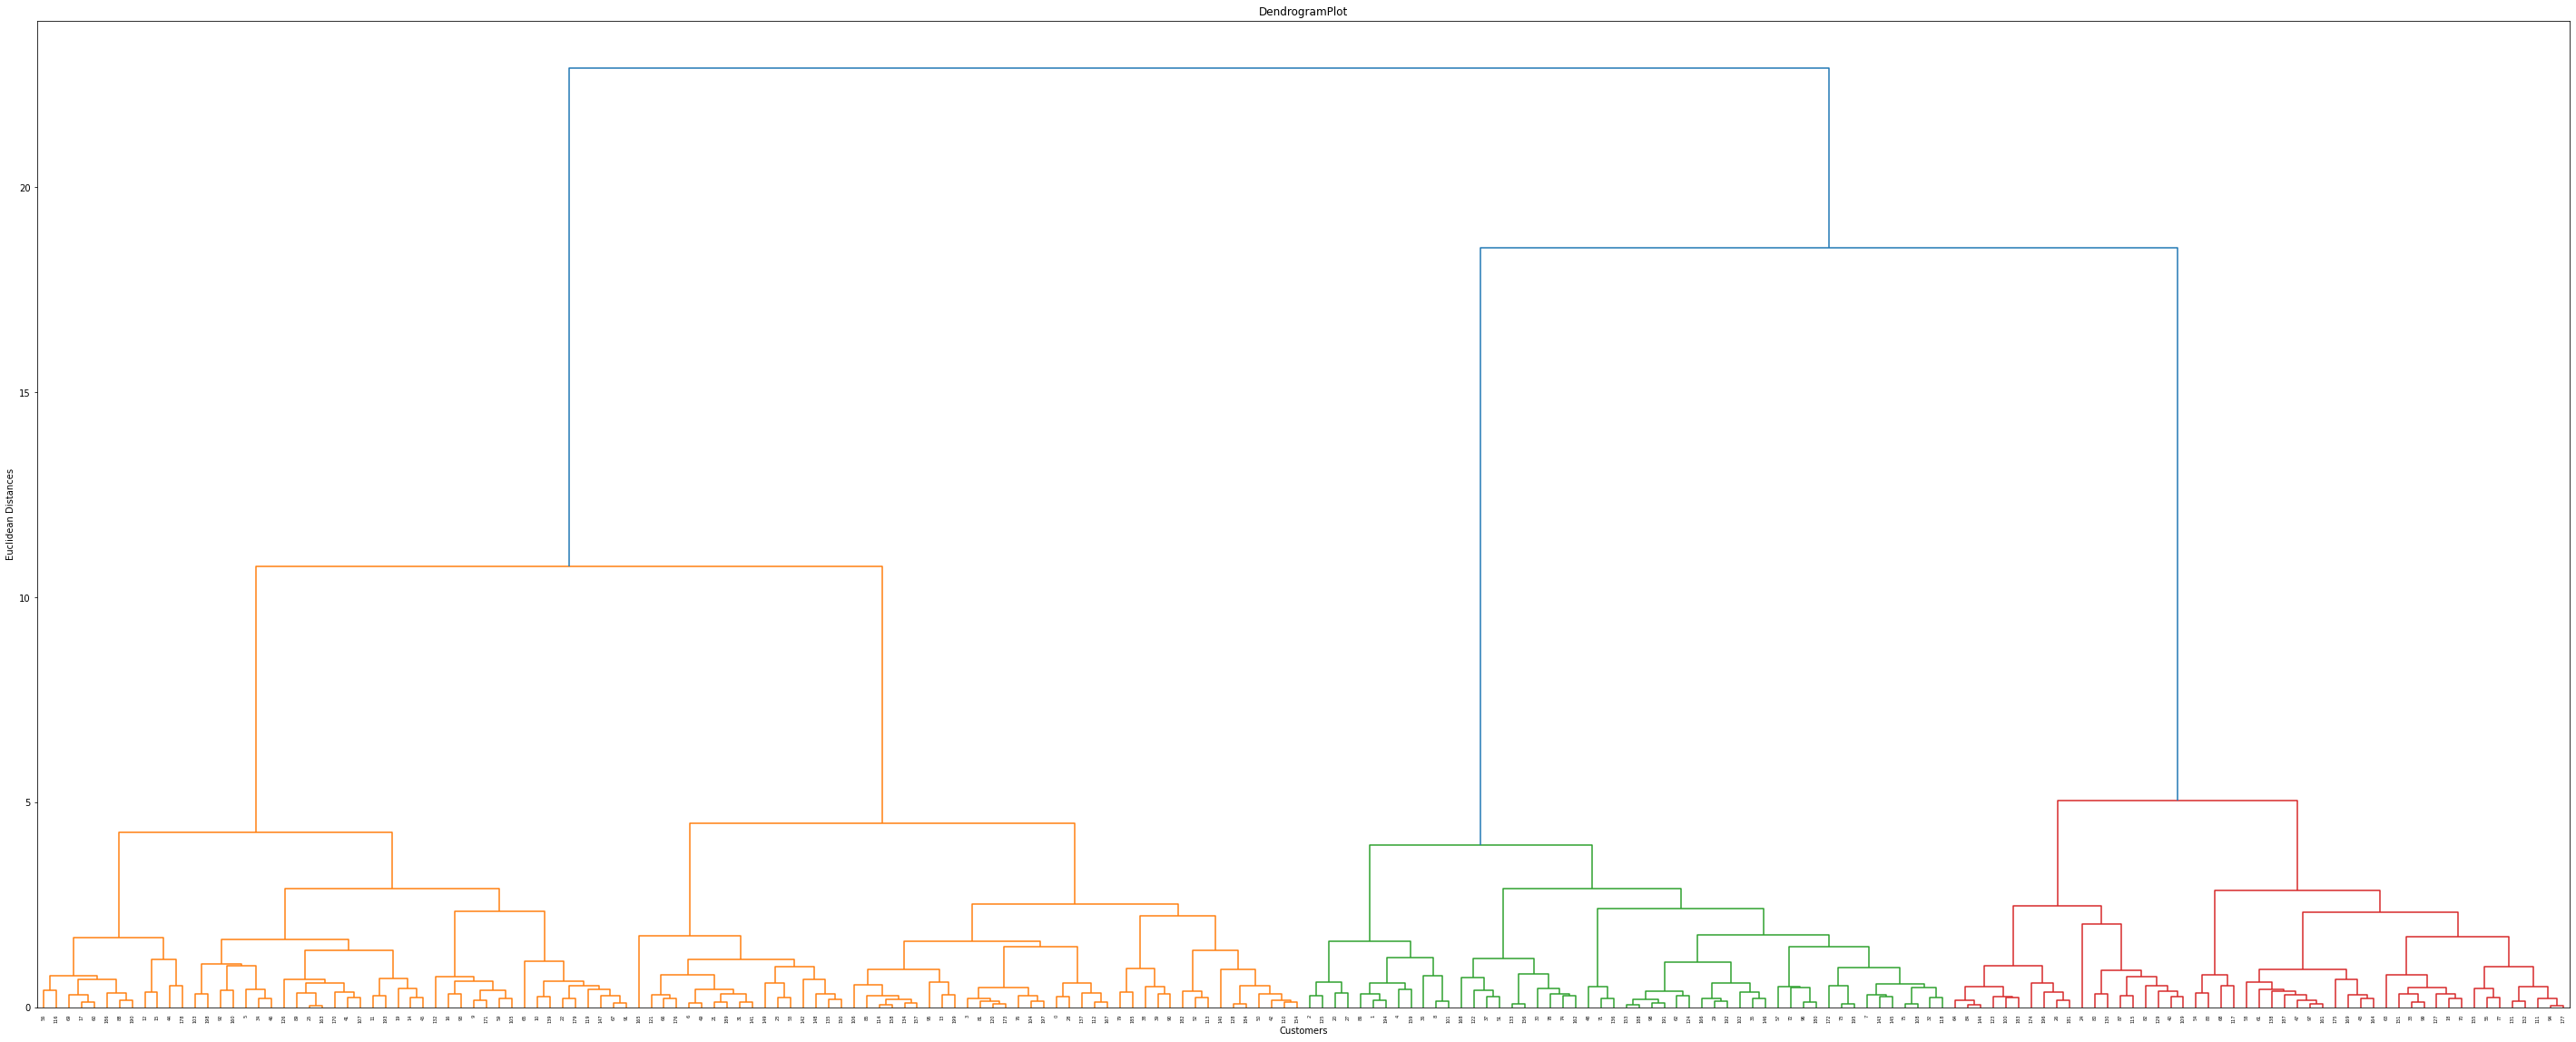

In [15]:
plt.figure(figsize=(50,20)) 
den = sh.dendrogram(sh.linkage(df, method="ward"))  
plt.title('DendrogramPlot')  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Customers")

plt.show()  

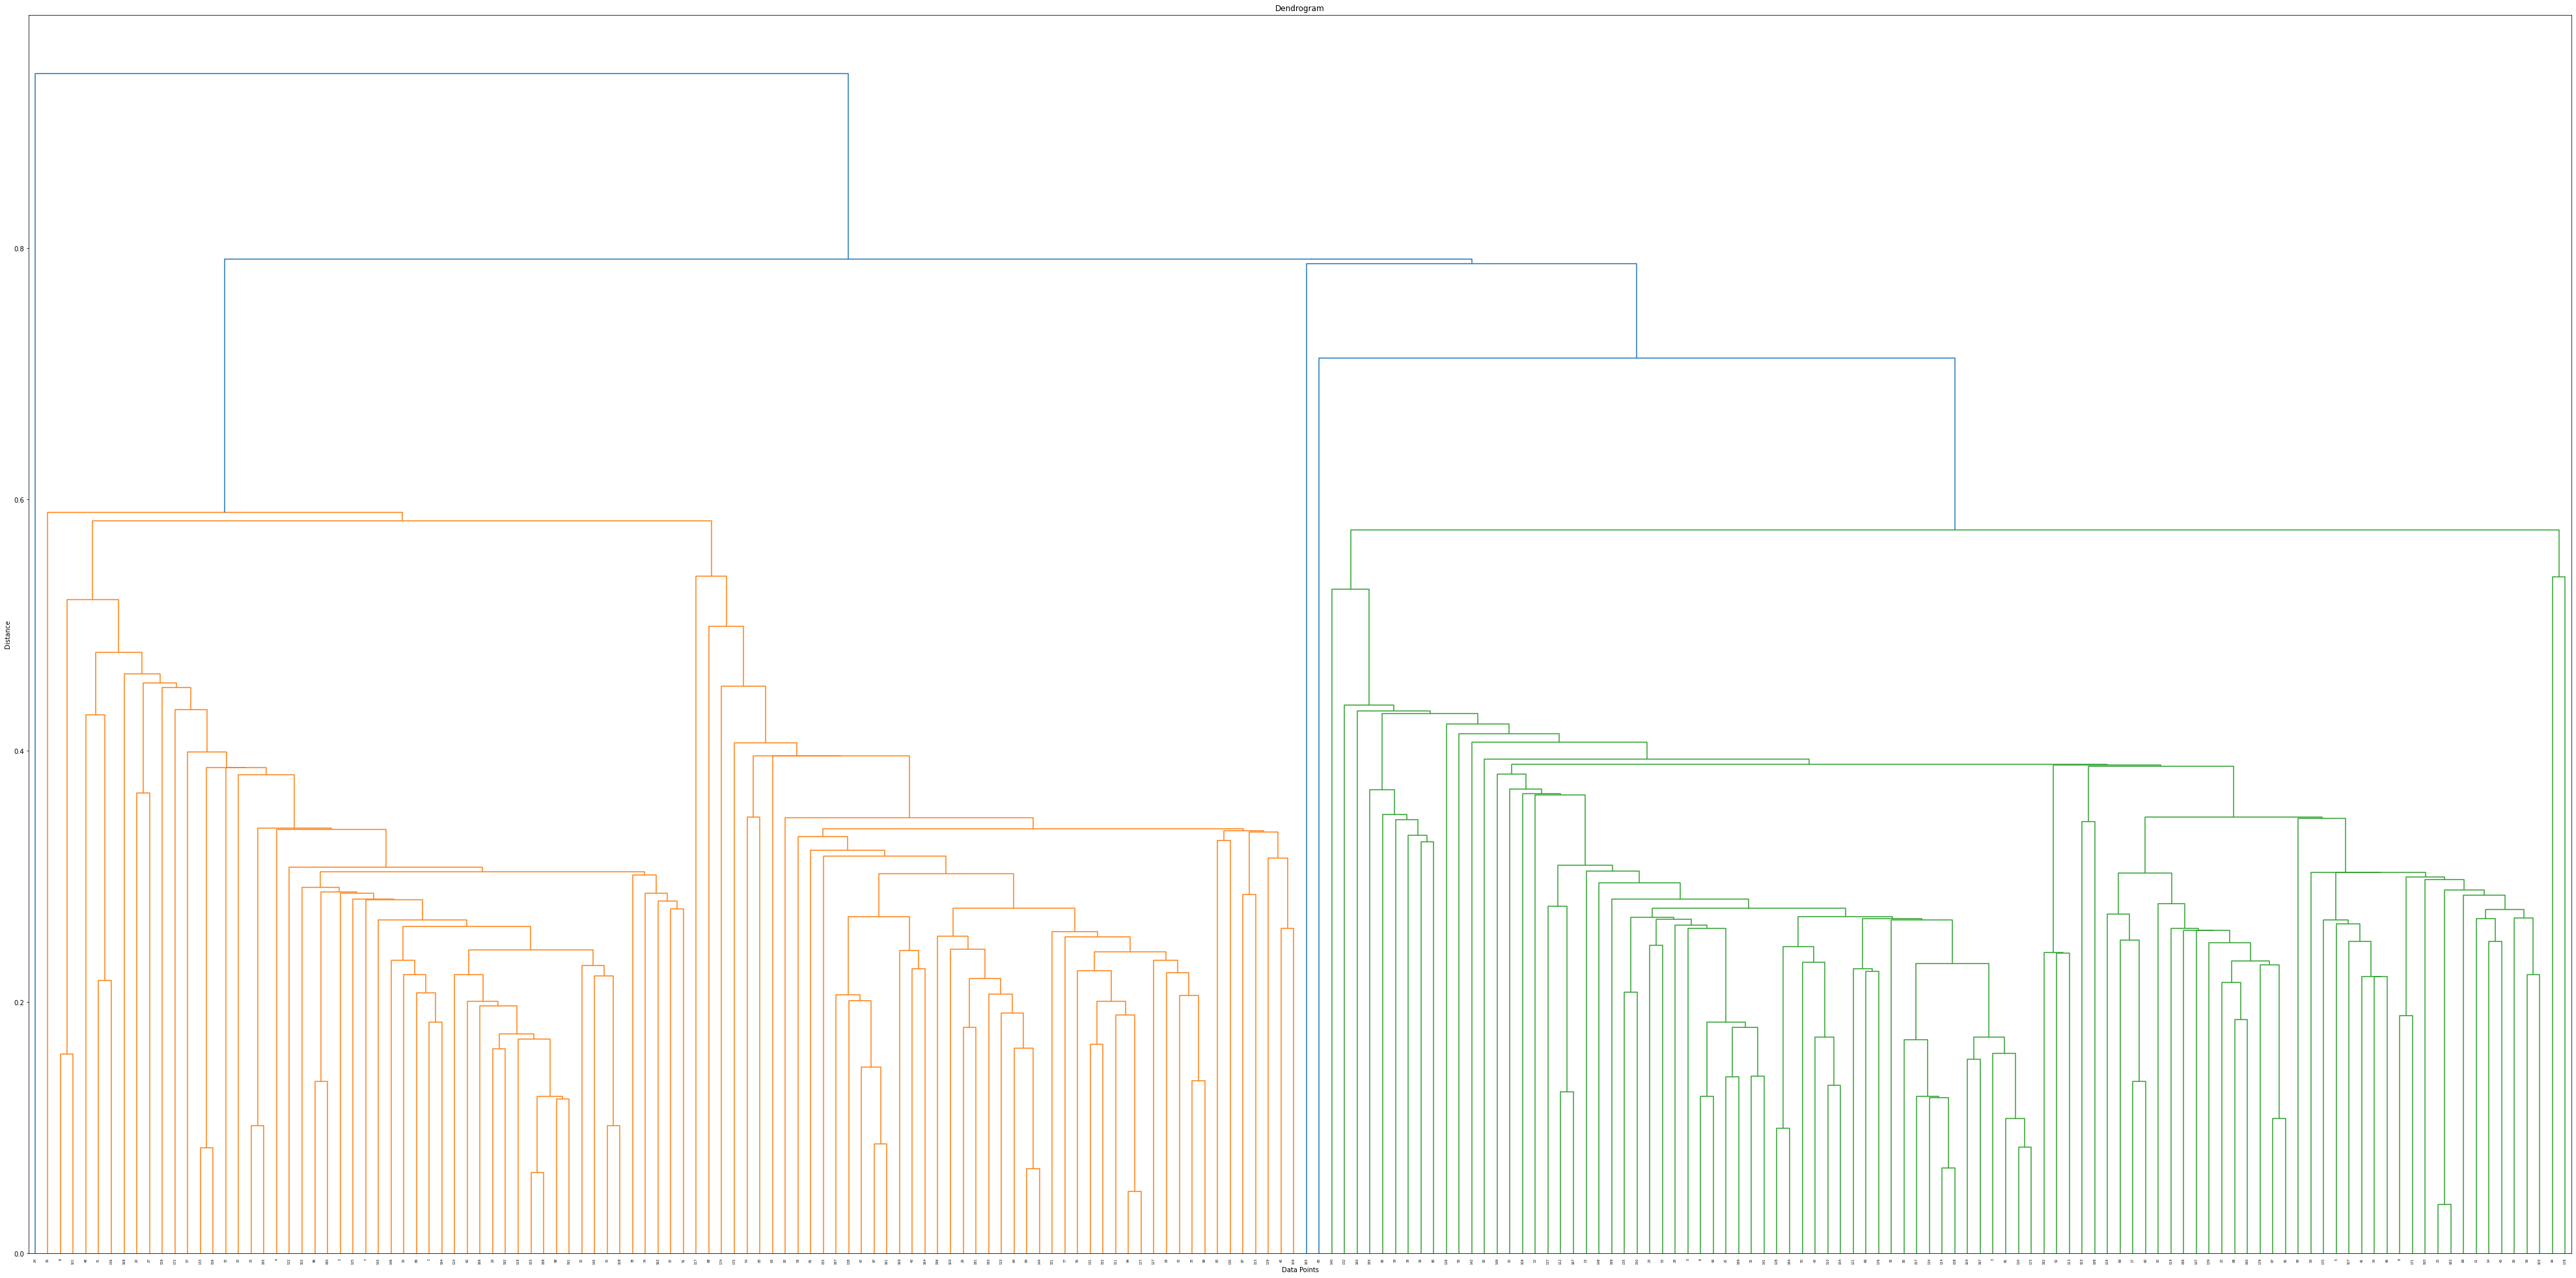

In [18]:
prox = sh.linkage(df, method='single')

# Plot the dendrogram
plt.figure(figsize=(70, 35))
sh.dendrogram(prox)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

In [19]:
df=pd.DataFrame(df,columns=['x','y','z'])

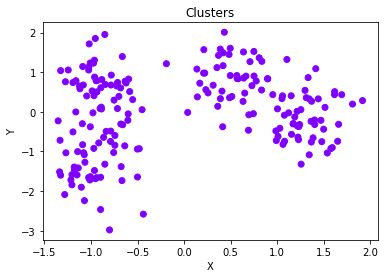

In [20]:


# Assign labels to the data points based on the threshold distance
thres = 2
labels = fcluster(prox, thres, criterion='distance')

# Plot the different clusters with different colors
plt.scatter(df['x'], df['y'], c=labels, cmap='rainbow')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Cluster')
plt.show()

In [28]:
fig = f_f.create_dendrogram(df)
fig.update_layout(width=1350, height=1000)
fig.show()

Number of cluster - 2

In [33]:
from sklearn.cluster import AgglomerativeClustering
a_clu=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='single')
y_p=a_clu.fit_predict(df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



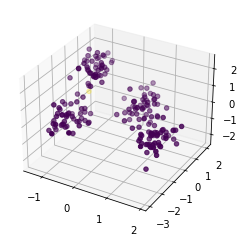

In [34]:
import matplotlib.pyplot as plt
ax=plt.axes(projection='3d')
ax.scatter3D(df['x'],df['y'],df['z'],c=y_p)